# Gaussian process regression for sparse data

This notebook trains and evaluates a random Fourier feature based Gaussian process regressor model (RFFGPR) on the artificial sparse data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import rfflearn.
import rfflearn.cpu as rfflearn

# If you want to enable GPU, please import rfflearn like the following instead.
#import rfflearn.gpu as rfflearn

## Generate artificial data

Generate artificial data and plot it.

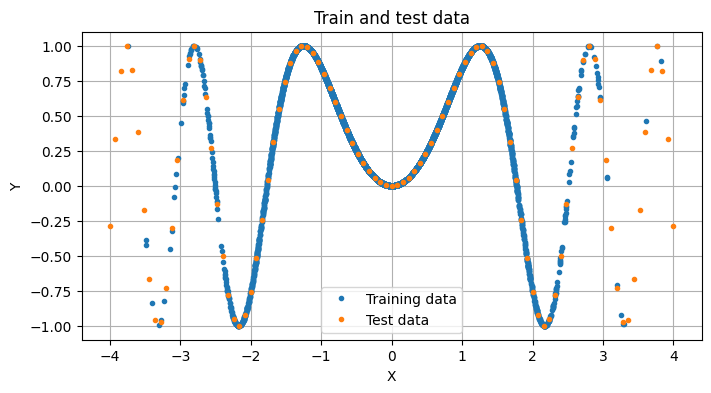

In [2]:
# Define the number of samples.
n_train = 10000
n_test  = 101

# Generate data.
Xs_train = np.random.randn(n_train, 1)
ys_train = np.sin(Xs_train**2)
Xs_test  = np.linspace(-4, 4, n_test).reshape((n_test, 1))
ys_test  = np.sin(Xs_test**2)

# Plot the data.
plt.figure(figsize=(8, 4))
plt.title("Train and test data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(Xs_train, ys_train, ".", label="Training data")
plt.plot(Xs_test,  ys_test,  ".", label="Test data")
plt.legend()
plt.grid(True)
plt.show()

## Train and evaluate a GPR model

### Instanciate GPR model¶

Instanciate one of the following GPR model:

* `sklearn.gaussian_process.GaussianProcessRegressor`: Normal Gaussian process regressor from Scikit-learn.
* `RFFGPR`: Gaussian process regressor with random Fourier features.
* `ORFGPR`: Similar to `RFFGPR`, but orthogonal random features are used.
* `QRFGPR`: Similar to `RFFGPR`, but quasi-random numbers are used.

In [3]:
# Normal Gaussian process regressor.
# kfn = sklearn.gaussian_process.kernels.RBF(1.0 / args["--std_kernel"]) \
#     + sklearn.gaussian_process.kernels.WhiteKernel(args["--std_error"])
# gpr = sklearn.gaussian_process.GaussianProcessRegressor(kernel=kf, random_state=args["--seed"])

# Gaussian process regressor with random Fourier features.
gpr = rfflearn.RFFGPR(dim_kernel=32, std_kernel=5.0, std_error=1.0)

# Gaussian process regressor with orthogonal random features.
# gpr = rfflearn.ORFGPR(dim_kernel=32, std_kernel=5.0, std_error=1.0)

# Gaussian process regressor with quasi-random Fourier features.
# gpr = rfflearn.QRFGPR(dim_kernel=32, std_kernel=5.0, std_error=1.0)

### Train the model

In [4]:
%%time

rfflearn.seed(111)

# Train GPR.
gpr.fit(Xs_train, ys_train)

CPU times: total: 0 ns
Wall time: 7 ms


### Evaluate on the data

In [5]:
# Conduct prediction for the test data.
pred, pstd, pcov = gpr.predict(Xs_test, return_std=True, return_cov=True)

# Compute score.
print("R2 score:", gpr.score(Xs_test, ys_test))

R2 score: 0.3628913705421547


### Plot the results

Plot the regression result. The Gaussian process regressor can compute the standard deviation of the prediction. The standard deviatin (1-sigma area) of the prediction is visualized as a gray region in the following figure.

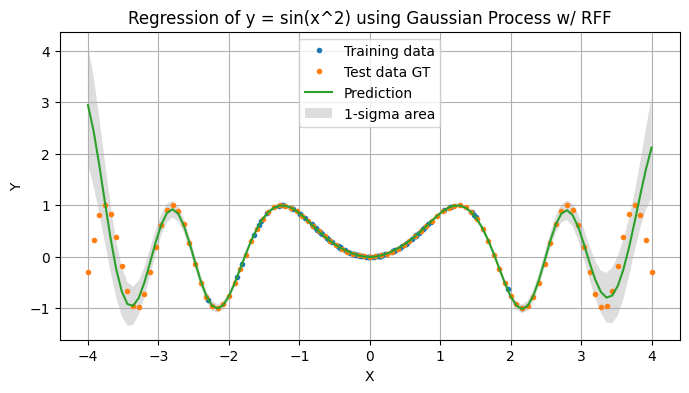

In [6]:
plt.figure(figsize=(8, 4))
plt.title("Regression of y = sin(x^2) using Gaussian Process w/ RFF")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(Xs_train[::100], ys_train[::100], ".")
plt.plot(Xs_test,         ys_test,         ".")
plt.plot(Xs_test,         pred,            "-")
plt.fill_between(Xs_test.reshape((Xs_test.shape[0],)),  pred - pstd, pred + pstd, facecolor="#DDDDDD")
plt.legend(["Training data", "Test data GT", "Prediction", "1-sigma area"])
plt.grid(True)
plt.show()

The next visualization is a re-sampling from the trained model.

Note that this re-sampling code is contribusion of [Dr. Sebastian Khan](https://github.com/Cyberface).
He shared the code in [the Issue 7](https://github.com/tiskw/random-fourier-features/issues/7).

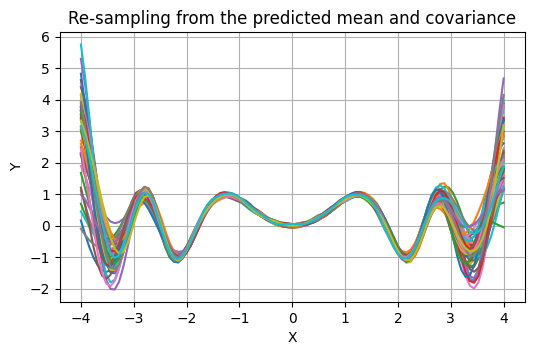

In [7]:
# Re-sampling from the predicted mean and covariance to verify the mean and covariance.
ys_samples = np.random.multivariate_normal(pred, pcov, size=50)

# Plot re-sampled data.
plt.figure(figsize=(6, 3.5))
plt.title("Re-sampling from the predicted mean and covariance")
plt.xlabel("X")
plt.ylabel("Y")
for ys_sample in ys_samples:
    plt.plot(Xs_test, ys_sample, "-")
plt.grid(True)
plt.show()